<a href="https://colab.research.google.com/github/PingMoon93/PingMoon93/blob/main/HLT_Assignment1_2024_TaoPing22202301_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment1-Analysis on the language style of Buddhism and Physics in the internet

##Scraping the data on reddit by using PRAW.

In [ ]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [ ]:
ci = "UFW0ZokQduiXIQ8LS4iQUQ" #your client id
cs = "pTsu-W-Nn1vpe1ey4Gyrrt597GdJtw" #your client secret
ua = "PingMoon" #your user agent name
sub = "Physics" #the name of the subreddit (not including the 'r/')

In [ ]:
import praw
from praw.models import MoreComments

reddit = praw.Reddit(
    client_id=ci,
    client_secret=cs,
    user_agent=ua
)

with open(sub+".txt", "w") as f:


    for post in reddit.subreddit(sub).top(limit=20):

        #this line collects the post titles
        f.write(post.title+"\n")

        #this line collects the post content
        f.write(post.selftext+"\n")

        #this section collects the comments
        for comment in post.comments:
            if isinstance(comment, MoreComments):
                continue
            f.write(comment.body+"\n")

In [ ]:
import nltk
import matplotlib
import re

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/pingtao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Upload the two txt.files.

In [ ]:
def load_txt(file):
    with open(file, encoding='utf8') as f:
        return ' '.join(line.strip() for line in f.readlines())

In [ ]:
Physics_txt = load_txt('Physics.txt')
Buddhism_txt = load_txt('Buddhism.txt')

##Preprocess the txt.files
Look at the sentences at the beginning and end of these two texts

In [ ]:
print(Physics_txt[:1000])

Physicist Stephen Hawking dies aged 76  This one hits especially hard. One of the most iconic physicists in the history of mankind. Damn. His mind was absolutely invaluable. This is a shame. "I’m not afraid of death, but I’m in no hurry to die. I have so much I want to do first."  * Stephen Hawking   I remember picking up "A Brief History of Time" my sophomore year in high school.  Before then I was sort of interested in science, but that book was so approachable, without being dumbed down, and utterly fixated me on physics. It is THE reason I pursued physics at university.  Rest in Peace Professor Hawking, you inspired a generation and beyond. [deleted] Albert Einstein born March 14 Stephen Hawking died March 14 Stephen will have left us with some of the innovative and ground breaking thinking about the nature of existence. He will also serve as an incredible story of how to go on living an incredible life despite a debilitating disease. What a legend.  Cheers to Stephen and long live

In [ ]:
print(Buddhism_txt[:1000])

Buddha’s Four Noble Truths for a four year old  FTFY: Buddha's 4 Noble Truths for all ages.  ;-) I translated these into Finnish for a literal four-years-old. She didn't seem to understand it and didn't care enough to listen to it. But I personally liked the simplification enough so that I printed it and put in on my wall. This makes me, a 24 year old, understand it better 🤣 After reading the comments... I’m now very conflicted😅 FINALLY!!! Horror! Horrible to see see simplification like that spoiling the teachings.  I understand one wants to do good things, but actually is doing a lot wrongful... Hmm.. Only problem is, the buddhist moral guidelines are meant to provide a life without a bad conscience, so the mind is clear when samadhi is practiced and realizations leading to nibbana can occur.  If the goal was to build a tree house, this guide stops with gathering the tools, leaving out even materials and the work itself.  Of course the tools are important. But they are not the work an

In [ ]:
Buddhism_txt[-1000:]

"e a goose 😂 The chanting sounds good to me. I do notice that I do not like the repeating of it though. Something about it cutting off and then repeating at :15 is a bit jarring and I'm not able to put my finger on it. [removed] Now I've seen everything,  a goose doing kinhin.  😆 Made my morning! And also participating in Kinhin.... very nice technique What a sweet little friend they have there! I would have a hard time not going into cute overload if I were there! Turns out INNER peace was an option. “Inner Peace was always an option” Wow, it's Er Mei! Good boy goose. ❤️❤️ Geese is aiming to awaken his Dao nascent soul to become a true cultivator This is a recon mission. The goose will soon learn that the monks are a peaceful ppl.  The geese will come with murderous intent and in numbers soon...mark my words When even a goose is ahead of me on the path .. lol you better be back to save me goose Goose joins in or geese join in. Rev. Goose enters the Temple! u/savevideo Love this 南無阿弥陀佛

In [ ]:
Physics_txt[-1000:]

"lated videos to watch. I'll keep this updated as long as I can. *** [Play All](http://subtletv.com/_r68tkxz?feature=playlist&ftrlnk=1) | [Info](https://np.reddit.com/r/SubtleTV/wiki/mentioned_videos) | Get me on [Chrome](https://chrome.google.com/webstore/detail/mentioned-videos-for-redd/fiimkmdalmgffhibfdjnhljpnigcmohf) / [Firefox](https://addons.mozilla.org/en-US/firefox/addon/mentioned-videos-for-reddit) As always, the periodic table appears to have a pattern that's just distorted enough not to fit 100%. Someone should make a new table organized by color, just for fun That's awesome Heavy elements are made from the s-process and r-process. Neutron star merger may be an r-process site, but it's not the entirety of heavy element synthesis. I love how we use helium. The universe: **WITH THE BEGINNING OF THE EVERYTHING THAT IS I PRESENT YOU THE SECOND ELEMENT THAT WILL BUILD UP THIS UNIVERSE** humans: lol let's blow up latex bags with it Um... What about god created them? What about Go

##Tokenising

##Tokenise the two text.

In [ ]:
Buddhism_tokens = nltk.word_tokenize(Buddhism_txt)
print(Buddhism_tokens[:50]) #print the first 50 tokens to see what they look like

['Buddha', '’', 's', 'Four', 'Noble', 'Truths', 'for', 'a', 'four', 'year', 'old', 'FTFY', ':', 'Buddha', "'s", '4', 'Noble', 'Truths', 'for', 'all', 'ages', '.', ';', '-', ')', 'I', 'translated', 'these', 'into', 'Finnish', 'for', 'a', 'literal', 'four-years-old', '.', 'She', 'did', "n't", 'seem', 'to', 'understand', 'it', 'and', 'did', "n't", 'care', 'enough', 'to', 'listen', 'to']


In [ ]:
Physics_tokens = nltk.word_tokenize(Physics_txt)
print(Physics_tokens[:50]) #print the first 50 tokens to see what they look like

['Physicist', 'Stephen', 'Hawking', 'dies', 'aged', '76', 'This', 'one', 'hits', 'especially', 'hard', '.', 'One', 'of', 'the', 'most', 'iconic', 'physicists', 'in', 'the', 'history', 'of', 'mankind', '.', 'Damn', '.', 'His', 'mind', 'was', 'absolutely', 'invaluable', '.', 'This', 'is', 'a', 'shame', '.', '``', 'I', '’', 'm', 'not', 'afraid', 'of', 'death', ',', 'but', 'I', '’', 'm']


Converting to lowercase

In [ ]:
Physics_lowercase = [t.lower() for t in Physics_tokens]

print(Physics_lowercase[:50]) #print the first 40 tokens to see what they look like

['physicist', 'stephen', 'hawking', 'dies', 'aged', '76', 'this', 'one', 'hits', 'especially', 'hard', '.', 'one', 'of', 'the', 'most', 'iconic', 'physicists', 'in', 'the', 'history', 'of', 'mankind', '.', 'damn', '.', 'his', 'mind', 'was', 'absolutely', 'invaluable', '.', 'this', 'is', 'a', 'shame', '.', '``', 'i', '’', 'm', 'not', 'afraid', 'of', 'death', ',', 'but', 'i', '’', 'm']


In [ ]:
Buddhism_lowercase = [t.lower() for t in Buddhism_tokens]

print(Buddhism_lowercase[:50]) #print the first 20 tokens to see what they look like

['buddha', '’', 's', 'four', 'noble', 'truths', 'for', 'a', 'four', 'year', 'old', 'ftfy', ':', 'buddha', "'s", '4', 'noble', 'truths', 'for', 'all', 'ages', '.', ';', '-', ')', 'i', 'translated', 'these', 'into', 'finnish', 'for', 'a', 'literal', 'four-years-old', '.', 'she', 'did', "n't", 'seem', 'to', 'understand', 'it', 'and', 'did', "n't", 'care', 'enough', 'to', 'listen', 'to']


Removing punctuation

In [ ]:
Physics_no_punct = [t for t in Physics_lowercase if t.isalnum()]

print(Physics_no_punct[:50]) #print the first 50 tokens to see what they look like

['physicist', 'stephen', 'hawking', 'dies', 'aged', '76', 'this', 'one', 'hits', 'especially', 'hard', 'one', 'of', 'the', 'most', 'iconic', 'physicists', 'in', 'the', 'history', 'of', 'mankind', 'damn', 'his', 'mind', 'was', 'absolutely', 'invaluable', 'this', 'is', 'a', 'shame', 'i', 'm', 'not', 'afraid', 'of', 'death', 'but', 'i', 'm', 'in', 'no', 'hurry', 'to', 'die', 'i', 'have', 'so', 'much']


In [ ]:
Buddhism_no_punct = [t for t in Buddhism_lowercase if t.isalnum()]

print(Buddhism_no_punct[:50]) #print the first 50 tokens to see what they look like

['buddha', 's', 'four', 'noble', 'truths', 'for', 'a', 'four', 'year', 'old', 'ftfy', 'buddha', '4', 'noble', 'truths', 'for', 'all', 'ages', 'i', 'translated', 'these', 'into', 'finnish', 'for', 'a', 'literal', 'she', 'did', 'seem', 'to', 'understand', 'it', 'and', 'did', 'care', 'enough', 'to', 'listen', 'to', 'it', 'but', 'i', 'personally', 'liked', 'the', 'simplification', 'enough', 'so', 'that', 'i']


Removing stop words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
Physics_no_stop = [t for t in Physics_no_punct if t not in stopwords.words('english')]

In [ ]:
Buddhism_no_stop = [t for t in Buddhism_no_punct if t not in stopwords.words('english')]

Lexical diversity

In [ ]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [ ]:
orig = lexical_diversity(Physics_tokens)
pre = lexical_diversity(Physics_no_stop)

print("Original:", orig)
print("Pre-Processed", pre)

Original: 0.16115990520005577
Pre-Processed 0.30138805871023444


In [ ]:
orig = lexical_diversity(Buddhism_tokens)
pre = lexical_diversity(Buddhism_no_stop)

print("Original:", orig)
print("Pre-Processed", pre)

Original: 0.16811259806183665
Pre-Processed 0.3228805017359167


In [ ]:
fd = nltk.FreqDist(Physics_no_stop)
print(fd.most_common(20))

[('like', 153), ('one', 146), ('physics', 139), ('would', 139), ('https', 101), ('get', 82), ('science', 78), ('time', 75), ('people', 68), ('really', 68), ('see', 64), ('black', 61), ('much', 57), ('image', 54), ('know', 53), ('think', 52), ('http', 51), ('years', 51), ('hawking', 47), ('deleted', 47)]


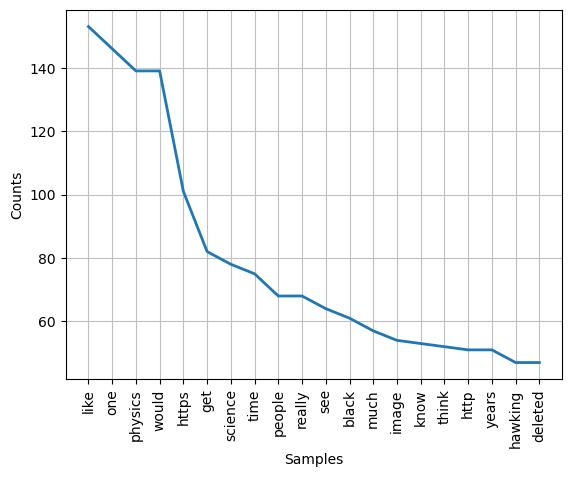

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fd.plot(20)

In [ ]:
fd = nltk.FreqDist(Buddhism_no_stop)
print(fd.most_common(20))

[('like', 103), ('beautiful', 89), ('thank', 86), ('love', 71), ('peace', 61), ('life', 58), ('one', 57), ('great', 57), ('buddha', 54), ('would', 52), ('really', 50), ('buddhism', 48), ('much', 45), ('may', 45), ('people', 43), ('time', 42), ('work', 41), ('happy', 39), ('teachings', 37), ('good', 36)]


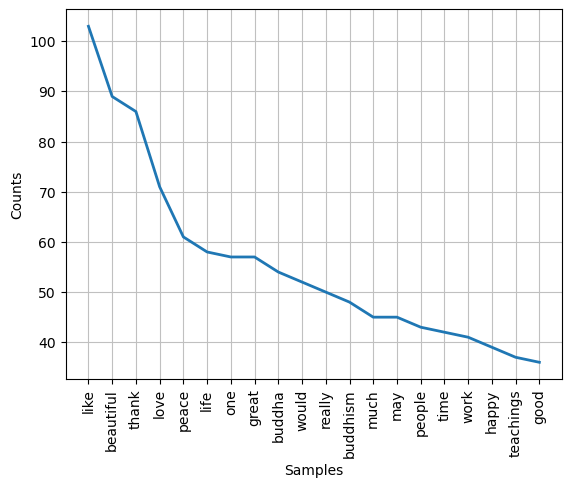

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fd.plot(20)

We found that "like" is the word with the highest frequency in these two texts, and we want to see the context for this word

In [ ]:
from nltk import Text
Physics_no_stop_text = Text(Physics_no_stop)
keyword = "like"
print("Concordance in Physics_no_stop:")
Physics_no_stop_text.concordance(keyword)


Concordance in Physics_no_stop:
Displaying 25 of 153 matches:
ent supervisor one phd students felt like student sad hear incredible physicis
one inherently emotional topic would like remind everyone thoughtful mature co
rap real ca believe genius time gone like world lost giant believe one inspira
 read headline say though life seems like life well lived massively outlasted 
eally hard picked brief history time like 12 mainly got interested physics rip
n hawking sent phd application today like think fitting tribute rest easy prof
 science really missed cliche figure like bill nye journalists loved popular l
ings fitting time go well shit looks like figuring black holes time soon count
worry phd come realize know anything like college lol jokes graduate degree su
teach political science said college like amway would truly consistent gut the
understood time dilation happen look like happens rocket blasting away would l
aaahhhahahaaaa played almost exactly like scientology level ot iii ex

In [ ]:
Buddhism_no_stop_text = Text(Buddhism_no_stop)
keyword = "like"
print("Concordance in Buddhism_no_stop:")
Buddhism_no_stop_text.concordance(keyword)

Concordance in Buddhism_no_stop:
Displaying 25 of 103 matches:
rror horrible see see simplification like spoiling teachings understand one wa
ion suffering sure 4 years old seems like written adorable four year old give 
ngs people want discuss pretend need like stopping terrorists taking control g
terrorists taking control government like tried punished buddha made even simp
mmon atheist christian western world like simplify little makes mind clearer m
year old ready supposed ponder feels like telling tadpole jump yeh ran crying 
 crying said cause sister gave candy like feel sad always care others nobody s
d spirit young age rather finding 40 like many late post great children adults
ons book put bag reading books feels like right next talking directly like lov
els like right next talking directly like loving father words always found way
eat sadness also gratitude love feel like going cry like lost loved one may re
o gratitude love feel like going cry like lost loved one may rest pe

Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pingtao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sen1 = SentimentIntensityAnalyzer()
sen1_scores = sen1.polarity_scores(str(Buddhism_no_stop_text))
print("Sentiment Scores:",sen1_scores)

Sentiment Scores: {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'compound': 0.7003}


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sen2 = SentimentIntensityAnalyzer()
sen2_scores = sen2.polarity_scores(str(Physics_no_stop_text))
print("Sentiment Scores:",sen2_scores)

Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Topic Model

In [ ]:
from nltk.tokenize import word_tokenize
Physics_text_str = ' '.join(Physics_no_stop_text)
tokens1 = word_tokenize(Physics_text_str)
pos1_tags = nltk.pos_tag(tokens1)
print("POS1 TAGS:",pos1_tags)

POS1 TAGS: [('physicist', 'NN'), ('stephen', 'NN'), ('hawking', 'VBG'), ('dies', 'NNS'), ('aged', 'VBD'), ('76', 'CD'), ('one', 'CD'), ('hits', 'NNS'), ('especially', 'RB'), ('hard', 'JJ'), ('one', 'CD'), ('iconic', 'JJ'), ('physicists', 'NNS'), ('history', 'NN'), ('mankind', 'NN'), ('damn', 'NN'), ('mind', 'NN'), ('absolutely', 'RB'), ('invaluable', 'JJ'), ('shame', 'NN'), ('afraid', 'JJ'), ('death', 'NN'), ('hurry', 'NN'), ('die', 'VBP'), ('much', 'RB'), ('want', 'VBP'), ('first', 'JJ'), ('stephen', 'NN'), ('hawking', 'VBG'), ('remember', 'VB'), ('picking', 'JJ'), ('brief', 'JJ'), ('history', 'NN'), ('time', 'NN'), ('sophomore', 'NN'), ('year', 'NN'), ('high', 'JJ'), ('school', 'NN'), ('sort', 'NN'), ('interested', 'JJ'), ('science', 'NN'), ('book', 'NN'), ('approachable', 'JJ'), ('without', 'IN'), ('dumbed', 'JJ'), ('utterly', 'RB'), ('fixated', 'VBN'), ('physics', 'NNS'), ('reason', 'NN'), ('pursued', 'VBN'), ('physics', 'NNS'), ('university', 'JJ'), ('rest', 'VBP'), ('peace', 'NN'

In [ ]:
desired_pos1_tags = ['NN','NNS']
filtered1_words = [word for word,pos1_tags in pos1_tags if desired_pos1_tags]
print("Filtered Words:",filtered1_words)

Filtered Words: ['physicist', 'stephen', 'hawking', 'dies', 'aged', '76', 'one', 'hits', 'especially', 'hard', 'one', 'iconic', 'physicists', 'history', 'mankind', 'damn', 'mind', 'absolutely', 'invaluable', 'shame', 'afraid', 'death', 'hurry', 'die', 'much', 'want', 'first', 'stephen', 'hawking', 'remember', 'picking', 'brief', 'history', 'time', 'sophomore', 'year', 'high', 'school', 'sort', 'interested', 'science', 'book', 'approachable', 'without', 'dumbed', 'utterly', 'fixated', 'physics', 'reason', 'pursued', 'physics', 'university', 'rest', 'peace', 'professor', 'hawking', 'inspired', 'generation', 'beyond', 'deleted', 'albert', 'einstein', 'born', 'march', '14', 'stephen', 'hawking', 'died', 'march', '14', 'stephen', 'left', 'us', 'innovative', 'ground', 'breaking', 'thinking', 'nature', 'existence', 'also', 'serve', 'incredible', 'story', 'go', 'living', 'incredible', 'life', 'despite', 'debilitating', 'disease', 'legend', 'cheers', 'stephen', 'long', 'live', 'science', 'assum

In [ ]:
Buddhism_text_str = ' '.join(Buddhism_no_stop_text)
tokens2 = word_tokenize(Buddhism_text_str)
pos2_tags = nltk.pos_tag(tokens2)
print("POS2 TAGS:",pos2_tags)

POS2 TAGS: [('buddha', 'RB'), ('four', 'CD'), ('noble', 'JJ'), ('truths', 'NNS'), ('four', 'CD'), ('year', 'NN'), ('old', 'JJ'), ('ftfy', 'NN'), ('buddha', 'NN'), ('4', 'CD'), ('noble', 'JJ'), ('truths', 'NNS'), ('ages', 'NNS'), ('translated', 'VBD'), ('finnish', 'JJ'), ('literal', 'JJ'), ('seem', 'NN'), ('understand', 'NN'), ('care', 'NN'), ('enough', 'JJ'), ('listen', 'NN'), ('personally', 'RB'), ('liked', 'JJ'), ('simplification', 'NN'), ('enough', 'RB'), ('printed', 'VBD'), ('put', 'VB'), ('wall', 'NN'), ('makes', 'VBZ'), ('24', 'CD'), ('year', 'NN'), ('old', 'JJ'), ('understand', 'NN'), ('better', 'RBR'), ('reading', 'NN'), ('comments', 'NNS'), ('finally', 'RB'), ('horror', 'VBP'), ('horrible', 'JJ'), ('see', 'NN'), ('see', 'VBP'), ('simplification', 'NN'), ('like', 'IN'), ('spoiling', 'VBG'), ('teachings', 'NNS'), ('understand', 'VBP'), ('one', 'CD'), ('wants', 'VBZ'), ('good', 'JJ'), ('things', 'NNS'), ('actually', 'RB'), ('lot', 'RB'), ('wrongful', 'JJ'), ('hmm', 'NN'), ('probl

In [ ]:
desired_pos2_tags = ['NN','NNS']
filtered2_words = [word for word,pos2_tags in pos2_tags if desired_pos2_tags]
print("Filtered Words:",filtered2_words)

Filtered Words: ['buddha', 'four', 'noble', 'truths', 'four', 'year', 'old', 'ftfy', 'buddha', '4', 'noble', 'truths', 'ages', 'translated', 'finnish', 'literal', 'seem', 'understand', 'care', 'enough', 'listen', 'personally', 'liked', 'simplification', 'enough', 'printed', 'put', 'wall', 'makes', '24', 'year', 'old', 'understand', 'better', 'reading', 'comments', 'finally', 'horror', 'horrible', 'see', 'see', 'simplification', 'like', 'spoiling', 'teachings', 'understand', 'one', 'wants', 'good', 'things', 'actually', 'lot', 'wrongful', 'hmm', 'problem', 'buddhist', 'moral', 'guidelines', 'meant', 'provide', 'life', 'without', 'bad', 'conscience', 'mind', 'clear', 'samadhi', 'practiced', 'realizations', 'leading', 'nibbana', 'occur', 'goal', 'build', 'tree', 'house', 'guide', 'stops', 'gathering', 'tools', 'leaving', 'even', 'materials', 'work', 'course', 'tools', 'important', 'work', 'goal', 'overall', 'buddhism', 'olds', 'simplified', 'enough', 'think', 'particular', 'way', 'teachin

Topic Model

In [ ]:
import nltk
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint
dictionary = corpora.Dictionary([tokens1,tokens2])
corpus = [dictionary.doc2bow(tokens) for tokens in [tokens1,tokens2]]
lda_model = LdaModel(corpus,num_topics=2,id2word=dictionary,passes=15)
pprint(lda_model.print_topics(num_words=5))

[(0,
  '0.009*"like" + 0.007*"beautiful" + 0.007*"thank" + 0.006*"love" + '
  '0.005*"peace"'),
 (1,
  '0.008*"like" + 0.008*"one" + 0.008*"would" + 0.008*"physics" + '
  '0.006*"https"')]
